In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:

df_colesterol = pd.read_csv('./datasets/dataset_colesterol.csv')

In [31]:

df_colesterol.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     996 non-null    str    
 2   Fumante             997 non-null    str    
 3   Nível de Atividade  996 non-null    str    
 4   Idade               997 non-null    float64
 5   Peso                997 non-null    float64
 6   Altura              997 non-null    float64
 7   Colesterol          1000 non-null   float64
dtypes: float64(4), int64(1), str(3)
memory usage: 62.6 KB


In [32]:
# Remover Coluna ID

df_colesterol.drop(columns=['Id'], axis='columns', inplace=True)

In [33]:
# Renomear as colunas
df_colesterol.columns = [
    'grupo_sanguineo',
    'fumante',
    'nivel_atividade_fisica',
    'idade',
    'peso',
    'altura',
    'nivel_colesterol'
]

In [34]:
df_colesterol.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguineo         996 non-null    str    
 1   fumante                 997 non-null    str    
 2   nivel_atividade_fisica  996 non-null    str    
 3   idade                   997 non-null    float64
 4   peso                    997 non-null    float64
 5   altura                  997 non-null    float64
 6   nivel_colesterol        1000 non-null   float64
dtypes: float64(4), str(3)
memory usage: 54.8 KB


In [35]:
# Copiar DF para DF EDA
df_colesterol_eda = df_colesterol.copy()

In [36]:
# Copiar DF para DF Bucketing
df_colesterol_bucketing = df_colesterol.copy()

## INICIO DE EDA 

Discutimos sobre a escolha adequada de medidas estatísticas para tratar valores ausentes em um DataFrame. Primeiramente, analisamos as medidas estatísticas das variáveis numéricas, como idade, peso e altura, e identificamos possíveis outliers. Em seguida, concluímos que a mediana seria uma escolha mais adequada para tratar valores ausentes, pois ela é menos sensível a outliers. Para as variáveis categóricas, utilizamos a moda, ou seja, o valor mais frequente da base. Demonstramos como realizar a imputação desses valores ausentes no DataFrame, coletando as medidas estatísticas e preenchendo os valores de uma vez só. Por fim, ressaltamos a importância de verificar o domínio dos tipos possíveis das variáveis categóricas e a necessidade de converter as variáveis numéricas para o tipo adequado.

In [37]:
df_colesterol_eda.head(10)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,A,Não,Moderado,68.0,105.0,184.0,236.98
2,O,Não,Alto,25.0,64.8,180.0,161.79
3,A,Não,Alto,43.0,120.2,167.0,336.24
4,AB,Não,Baixo,79.0,88.5,175.0,226.23
5,B,Não,Baixo,68.0,66.8,170.0,185.31
6,A,Sim,Baixo,60.0,117.3,181.0,289.33
7,O,Sim,Moderado,35.0,86.9,174.0,216.48
8,O,Não,Baixo,62.0,81.3,166.0,235.30
9,B,Sim,Alto,44.0,32.7,165.0,97.79


In [38]:
df_colesterol_eda.nivel_atividade_fisica.unique()

<StringArray>
['Baixo', 'Moderado', 'Alto', nan]
Length: 4, dtype: str

In [39]:
# Detectar valores ausentes
df_colesterol_eda.isna().sum()

grupo_sanguineo           4
fumante                   3
nivel_atividade_fisica    4
idade                     3
peso                      3
altura                    3
nivel_colesterol          0
dtype: int64

In [40]:
# Medidas estatisticas do DF
# Lembresse que usar a mediana para casos de outliers, em casos normais é possivel usar a media

df_colesterol_eda.describe()

,idade,peso,altura,nivel_colesterol
count,997.000000,997.000000,997.000000,1000.000000
mean,49.206620,76.496690,174.889669,199.453260
std,17.476704,21.439132,8.844703,50.625152
min,20.000000,15.400000,160.000000,36.260000
25%,34.000000,61.700000,167.000000,166.345000
50%,49.000000,75.500000,175.000000,199.455000
75%,65.000000,90.200000,183.000000,233.785000
max,79.000000,158.100000,190.000000,372.670000


In [41]:
# Coletar medidas das variaveis categoricaS

moda_grupo_sang = df_colesterol_eda.grupo_sanguineo.mode()
moda_fumante = df_colesterol_eda.fumante.mode()
moda_nivel_atividade = df_colesterol_eda.nivel_atividade_fisica.mode()

In [42]:
# Coletar medidas das variaveis numerifcas

mediana_idade = df_colesterol_eda.idade.median()
mediana_altura = df_colesterol_eda.altura.median()
mediana_peso = df_colesterol_eda.peso.median()
mediana_nivel_colesterol = df_colesterol_eda.nivel_colesterol.median()

In [43]:
# Imputar valores ausentes

df_colesterol_eda.fillna(value={
    'grupo_sanguineo': moda_grupo_sang[0],
    'fumante': moda_fumante[0],
    'nivel_atividade_fisica': moda_nivel_atividade[0],
    'idade': mediana_idade,
    'altura': mediana_altura,
    'peso': mediana_peso,
    # 'nivel_colesterol': mediana_nivel_colesterol,
     
      }, inplace=True)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,A,Não,Moderado,68.0,105.0,184.0,236.98
2,O,Não,Alto,25.0,64.8,180.0,161.79
3,A,Não,Alto,43.0,120.2,167.0,336.24
4,AB,Não,Baixo,79.0,88.5,175.0,226.23
...,...,...,...,...,...,...,...
995,AB,Sim,Moderado,31.0,68.1,166.0,206.81
996,O,Não,Alto,51.0,47.7,170.0,128.03
997,AB,Não,Baixo,39.0,85.5,176.0,211.14
998,AB,Sim,Baixo,61.0,91.2,161.0,284.53


In [44]:
df_colesterol_eda.isna().sum()

grupo_sanguineo           0
fumante                   0
nivel_atividade_fisica    0
idade                     0
peso                      0
altura                    0
nivel_colesterol          0
dtype: int64

Aprenderemos a converter os tipos de dados em um DataFrame. Primeiro, tratamos os valores ausentes para evitar erros durante a conversão. Em seguida, utilizamos o método type para alterar o tipo das variáveis. No exemplo, convertemos a idade e a altura para inteiros. É importante realizar o tratamento dos valores ausentes antes da conversão, pois isso evita erros. Ao final da aula, verificamos que o DataFrame agora possui as colunas de idade e altura como inteiros, além de ter resolvido os valores ausentes.

In [45]:
# Converter idade e altura para inteiro

df_colesterol_eda.idade = df_colesterol_eda.idade.astype(int)


df_colesterol_eda.altura = df_colesterol_eda.altura.astype(int)

In [46]:
df_colesterol_eda.head(3)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33,85.1,186,199.63
1,A,Não,Moderado,68,105.0,184,236.98
2,O,Não,Alto,25,64.8,180,161.79


In [47]:
df_colesterol_eda.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguineo         1000 non-null   str    
 1   fumante                 1000 non-null   str    
 2   nivel_atividade_fisica  1000 non-null   str    
 3   idade                   1000 non-null   int64  
 4   peso                    1000 non-null   float64
 5   altura                  1000 non-null   int64  
 6   nivel_colesterol        1000 non-null   float64
dtypes: float64(2), int64(2), str(3)
memory usage: 54.8 KB


<Axes: xlabel='idade'>

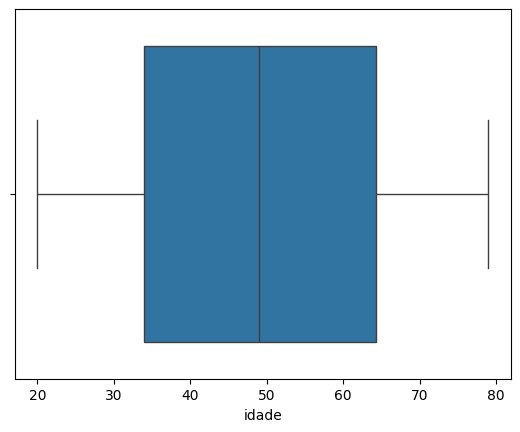

In [48]:
# Verificar / detectar outliers

sns.boxplot(data=df_colesterol_eda, x='idade')

<Axes: xlabel='peso'>

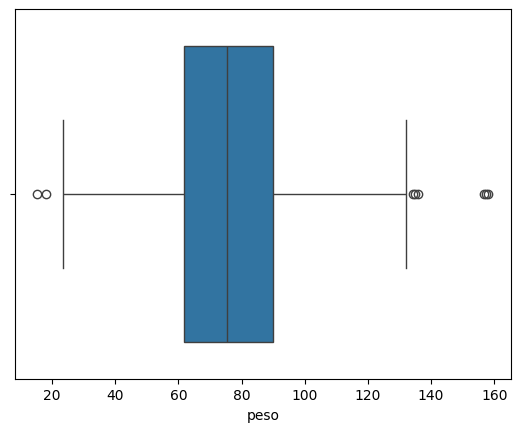

In [49]:
sns.boxplot(data=df_colesterol_eda, x='peso')

In [50]:
# Filtrar o publico a ser removido
df_colesterol_eda[df_colesterol_eda.peso < 40].peso.count()

np.int64(37)

In [51]:
# Remover publico do dateframe
df_colesterol_eda.drop(df_colesterol_eda[df_colesterol_eda.peso < 40].index,axis=0, inplace=True)

<Axes: xlabel='altura'>

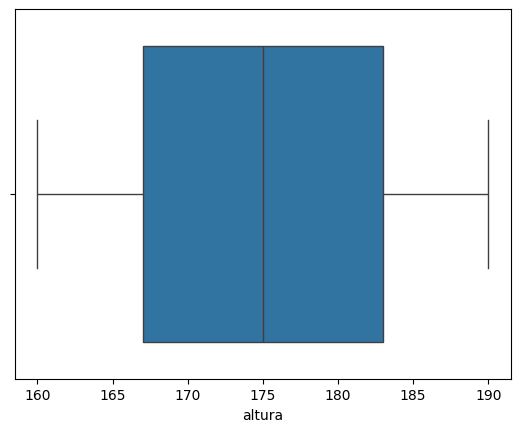

In [52]:
sns.boxplot(data=df_colesterol_eda, x='altura')